<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/DeepLearningMultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project

  Multiclass classification problem.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [3]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.2 MB 52 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 sha256=f88169c3271b26f6c9805fd0259efe1922c55032a9c6ca0af2542fed5bc7a198
  Stored in directory: /root/.cache/pip/wheels/a1/a1/d9/bb37df368c4635a707e7362d1088450b606041f05aeba5f173
Successfully built h2o


In [4]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzz4rf2ty
  JVM stdout: /tmp/tmpzz4rf2ty/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzz4rf2ty/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_k5qgr0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
data=pd.read_csv('/content/drive/MyDrive/License_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data.head()

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,...,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [8]:
data.describe()

,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,WARD,PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE_ID                         85895 non-null  int64  
 2   ACCOUNT_NUMBER                     85895 non-null  int64  
 3   SITE_NUMBER                        85895 non-null  int64  
 4   LEGAL_NAME                         85895 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP_CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [10]:
data.LICENSE_STATUS.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE_STATUS, dtype: int64

In [11]:
data=data[data.LICENSE_STATUS.isin(['AAI','AAC','REV'])]

In [12]:
data.isna().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                31
WARD                                 49699
PRECINCT                             56699
WARD_PRECINCT                        49698
POLICE_DISTRICT                      54010
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           1
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             64657
APPLICATION_REQUIREMENTS_COMPLETE      214
PAYMENT_DATE                          1287
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                228
LICENSE_TER

In [13]:
data.nunique()

ID                                   85890
LICENSE_ID                           85890
ACCOUNT_NUMBER                       38895
SITE_NUMBER                            177
LEGAL_NAME                           38742
DOING_BUSINESS_AS_NAME               41684
ADDRESS                              42143
CITY                                  1223
STATE                                   54
ZIP_CODE                              2456
WARD                                    50
PRECINCT                                76
WARD_PRECINCT                         2383
POLICE_DISTRICT                         28
LICENSE_CODE                           106
LICENSE_DESCRIPTION                    106
LICENSE_NUMBER                       49764
APPLICATION_TYPE                         5
APPLICATION_CREATED_DATE              2899
APPLICATION_REQUIREMENTS_COMPLETE     3078
PAYMENT_DATE                          4356
CONDITIONAL_APPROVAL                     2
LICENSE_TERM_START_DATE               2825
LICENSE_TER

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


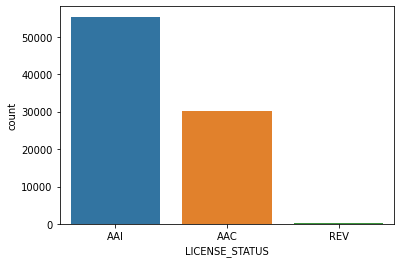

In [14]:
sns.countplot(data['LICENSE_STATUS'])
plt.show()

In [15]:
data.CONDITIONAL_APPROVAL.value_counts()

N    85872
Y       18
Name: CONDITIONAL_APPROVAL, dtype: int64

In [16]:
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator

In [17]:
data['LEGAL_BUSINESS_NAME_MATCH'] = data.apply(lambda x: 1 if str(x['LEGAL_NAME'].upper()) in str(x['DOING_BUSINESS_AS_NAME']) .upper()
                                             or str(x['DOING_BUSINESS_AS_NAME']).upper() in str(x['LEGAL_NAME']).upper() else 0, 
                                             axis=1)

In [18]:
data['LICENSE_DESCRIPTION'].value_counts()

Limited Business License                    50077
Home Repair                                 10632
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2320
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: LICENSE_DESCRIPTION, Length: 106, dtype: int64

In [21]:
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
data['LICENSE_DESCRIPTION'] = data['LICENSE_DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')



In [22]:
data['LICENSE_DESCRIPTION'].nunique()

92

In [23]:
data['LEGAL_NAME'] = data['LEGAL_NAME'].str.replace('.', '', regex=False)
data['DOING_BUSINESS_AS_NAME'] = data['DOING_BUSINESS_AS_NAME'].str.replace('.', '', regex=False)

data['BUSINESS_TYPE'] = 'PVT'

data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('INC'), 'INC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('INCORPORATED'), 'INC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('INC'), 'INC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('INCORPORATED'), 'INC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('LLC'), 'LLC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('LLC'), 'LLC', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('CO'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('CORP'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('CORPORATION'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('CO'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('CORP'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('CORPORATION'), 'CORP', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('LTD'), 'LTD', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['LEGAL_NAME'].str.contains('LIMITED'), 'LTD', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('LTD'), 'LTD', data['BUSINESS_TYPE'])
data['BUSINESS_TYPE'] = np.where(data['DOING_BUSINESS_AS_NAME'].str.contains('LIMITED'), 'LTD', data['BUSINESS_TYPE'])



In [24]:
data['BUSINESS_TYPE'].value_counts()

CORP    27763
PVT     27020
INC     24443
LLC      5048
LTD      1616
Name: BUSINESS_TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


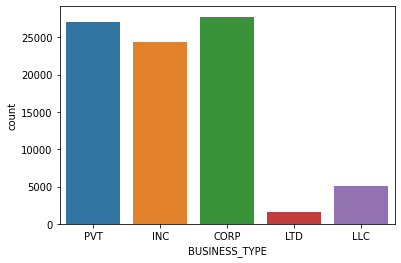

In [25]:
sns.countplot(data['BUSINESS_TYPE'])

In [26]:
data.ZIP_CODE.value_counts()

60804      1142
60647.0     925
60618       889
60639       878
60007       789
           ... 
90605         1
57108         1
52358         1
16801         1
61115.0       1
Name: ZIP_CODE, Length: 2456, dtype: int64

In [27]:
data['ZIP_CODE'].fillna(-1, inplace=True)
data['ZIP_CODE_MISSING'] = data.apply(lambda x: 1 if x['ZIP_CODE'] == -1 else 0, axis=1)

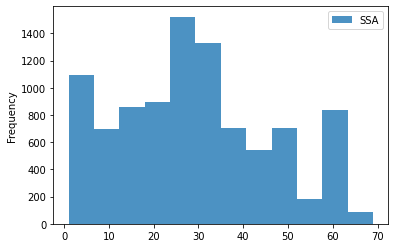

In [28]:
data[['SSA']].plot.hist(bins=12, alpha=0.8)

In [29]:
data['SSA'].fillna(-1, inplace=True)

In [30]:
data['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(-1, inplace=True)
data['APPLICATION_REQUIREMENTS_COMPLETE'] = data.apply(lambda x: 0 if x['APPLICATION_REQUIREMENTS_COMPLETE'] == -1 
                                                     else 1, axis=1)

# Train test split

In [32]:
train, test = train_test_split(data, test_size=0.2, random_state=123)

In [33]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
h2o_rf = H2ORandomForestEstimator(ntrees=100, seed=123, max_depth=10)
h2o_rf.train(x=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE'], 
             y='LICENSE_STATUS', training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1664139156347_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                300                         1.28941e+06            10           10           10            52            449           272.18

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.15953097856719542
RMSE: 0.39941329292750816
LogLoss: 0.4956308711207332
Mean Per-Class Error: 0.5010083289322868
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
AAC    AAI    REV    Error      Rate
-----  -----  -----  ---------  ---------------
12233  11861  18     0.492659   11,879 / 24,112
2847   41529  1      0.0641774  2,848 / 44,377
175    36     12     0.946188   211 / 223
15255  53426  31     0.2174     14,938 / 68,712

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.7826
2    0.99904
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------
    2022-09-25 21:28:33  0.088 sec   0                  nan              nan                 nan                              nan             nan
    2022-09-25 21:28:34  1.291 sec   1                  0.403304         0.638051            0.220504                         nan             nan
    2022-09-25 21:28:35  1.784 sec   2                  0.40375          0.618222            0.220586                         nan             nan
    2022-09-25 21:28:35  2.224 sec   3                  0.40316          0.612821            0.219389                         nan             nan
    2022-09-25 21:28:36  2.658 sec   4                  0.402172         0.587962            0.218653                         nan             nan
    2022-09-25 21:28:36  3.113 sec   5                  0.401343         0.573952            0.217887                         nan             nan
    2022-09-25 21:28:37  3.564 sec   6                  0.4009           0.560679            0.21759                          nan             nan
    2022-09-25 21:28:37  3.924 sec   7                  0.400632         0.546537            0.217292                         nan             nan
    2022-09-25 21:28:41  7.973 sec   23                 0.399788         0.502757            0.217065                         nan             nan
    2022-09-25 21:28:45  12.114 sec  44                 0.399522         0.498372            0.217357                         nan             nan
    2022-09-25 21:28:49  16.245 sec  68                 0.399468         0.495888            0.217298                         nan             nan
    2022-09-25 21:28:53  20.254 sec  90                 0.399445         0.49572             0.217269                         nan             nan
    2022-09-25 21:28:55  22.112 sec  100                0.399413         0.495631            0.2174                           nan             nan

Variable Importances: 
variable                           relative_importance    scaled_importance    percentage
---------------------------------  ---------------------  -------------------  ------------
LICENSE_DESCRI

In [35]:
predictions = h2o_rf.predict(test)
predictions['actual'] = test['LICENSE_STATUS']
predictions = predictions.as_data_frame()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'LICENSE_DESCRIPTION' has levels not trained on: ["Not-For-Profit Club"]
  warnings.warn(w)


In [36]:
accuracy = (predictions[predictions.actual == predictions.predict].shape[0])* 100.0 / predictions.shape[0]

In [37]:
print(accuracy)

78.3152869949936


## Deep Learning Model

In [38]:
predictors = ['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'SSA', 'LEGAL_BUSINESS_NAME_MATCH', 
                'ZIP_CODE_MISSING', 'SSA', 'APPLICATION_REQUIREMENTS_COMPLETE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE']

target = ["LICENSE_STATUS_AAC", "LICENSE_STATUS_AAI", "LICENSE_STATUS_REV"]

In [40]:
data[predictors].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85890 entries, 0 to 85894
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   APPLICATION_TYPE                   85890 non-null  object 
 1   CONDITIONAL_APPROVAL               85890 non-null  object 
 2   LICENSE_CODE                       85890 non-null  int64  
 3   SSA                                85890 non-null  float64
 4   LEGAL_BUSINESS_NAME_MATCH          85890 non-null  int64  
 5   ZIP_CODE_MISSING                   85890 non-null  int64  
 6   SSA                                85890 non-null  float64
 7   APPLICATION_REQUIREMENTS_COMPLETE  85890 non-null  int64  
 8   LICENSE_DESCRIPTION                85890 non-null  object 
 9   BUSINESS_TYPE                      85890 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 9.2+ MB


In [41]:
final_df = data[predictors + ["LICENSE_STATUS"]]
final_df = pd.get_dummies(final_df, columns=['APPLICATION_TYPE', 'CONDITIONAL_APPROVAL', 'LICENSE_CODE', 'LICENSE_DESCRIPTION', 'BUSINESS_TYPE', 'LICENSE_STATUS'])

final_df.columns



Index(['SSA', 'LEGAL_BUSINESS_NAME_MATCH', 'ZIP_CODE_MISSING', 'SSA',
       'APPLICATION_REQUIREMENTS_COMPLETE', 'APPLICATION_TYPE_C_CAPA',
       'APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC',
       'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW',
       ...
       'LICENSE_DESCRIPTION_Wholesale Food Establishment',
       'LICENSE_DESCRIPTION_Wrigley Field', 'BUSINESS_TYPE_CORP',
       'BUSINESS_TYPE_INC', 'BUSINESS_TYPE_LLC', 'BUSINESS_TYPE_LTD',
       'BUSINESS_TYPE_PVT', 'LICENSE_STATUS_AAC', 'LICENSE_STATUS_AAI',
       'LICENSE_STATUS_REV'],
      dtype='object', length=218)

In [42]:
final_df.head()

,SSA,LEGAL_BUSINESS_NAME_MATCH,ZIP_CODE_MISSING,SSA,APPLICATION_REQUIREMENTS_COMPLETE,APPLICATION_TYPE_C_CAPA,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,...,LICENSE_DESCRIPTION_Wholesale Food Establishment,LICENSE_DESCRIPTION_Wrigley Field,BUSINESS_TYPE_CORP,BUSINESS_TYPE_INC,BUSINESS_TYPE_LLC,BUSINESS_TYPE_LTD,BUSINESS_TYPE_PVT,LICENSE_STATUS_AAC,LICENSE_STATUS_AAI,LICENSE_STATUS_REV
0,25.0,0,0,25.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,60.0,1,0,60.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,-1.0,1,0,-1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,-1.0,1,0,-1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,-1.0,1,0,-1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [43]:
train, test = train_test_split(final_df, test_size=0.2, random_state=123)

X_train = train.drop(target, axis=1).values
y_train = train[target].values

X_test = test.drop(target, axis=1).values
y_test = test[target].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(68712, 215) (68712, 3) (17178, 215) (17178, 3)


In [44]:
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
model=keras.Sequential([layers.InputLayer(input_shape=(X_train.shape[1])),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(3, activation="softmax"),])

In [46]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               27648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1

In [47]:
model.fit(X_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
1074/1074 [==============================] - 4s 3ms/step - loss: 0.5435 - accuracy: 0.7712
Epoch 2/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5348 - accuracy: 0.7746
Epoch 3/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5354 - accuracy: 0.7753
Epoch 4/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5359 - accuracy: 0.7740
Epoch 5/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5350 - accuracy: 0.7751
Epoch 6/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5349 - accuracy: 0.7759
Epoch 7/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5384 - accuracy: 0.7735
Epoch 8/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.5349 - accuracy: 0.7753
Epoch 9/30
1074/1074 [==============================] - 3s 3ms/step - loss: 0.5342 - accuracy: 0.7760
Epoch 10/30
1074/1074 [==============================] - 3s 2ms/step - loss: 0.536

In [48]:
model.evaluate(X_test, y_test)

537/537 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7748


[0.5336877703666687, 0.7748282551765442]

In [49]:
model.predict(X_test)

array([[2.2481586e-01, 7.7503842e-01, 1.4578554e-04],
       [4.9581242e-01, 5.0384969e-01, 3.3784856e-04],
       [2.3761819e-01, 7.6203042e-01, 3.5139950e-04],
       ...,
       [2.2481586e-01, 7.7503842e-01, 1.4578554e-04],
       [2.2481586e-01, 7.7503830e-01, 1.4578551e-04],
       [2.9489371e-01, 7.0486474e-01, 2.4153834e-04]], dtype=float32)